In [22]:
import pandas as pd

# Load data from your CSV-like text file
file_path = "stock_results.txt"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Sort by symbol and date ascending
df = df.sort_values(by=['symbol', 'date'])

# Calculate returns for different horizons
df['next_day_return'] = df.groupby('symbol')['close_price'].pct_change().shift(-1)
df['return_5d'] = df.groupby('symbol')['close_price'].pct_change(periods=5).shift(-5)
df['return_10d'] = df.groupby('symbol')['close_price'].pct_change(periods=10).shift(-10)
df['return_20d'] = df.groupby('symbol')['close_price'].pct_change(periods=20).shift(-20)
df['return_30d'] = df.groupby('symbol')['close_price'].pct_change(periods=30).shift(-30)

# Make sure buy_signal column exists
if 'buy_signal' not in df.columns:
    df['buy_signal'] = False

# Updated function to summarize returns and include sample size
def summarize_returns(df, return_col):
    df_filtered = df.dropna(subset=[return_col])
    summary = df_filtered.groupby('buy_signal').agg(
        avg_return=(return_col, 'mean'),
        median_return=(return_col, 'median'),
        win_rate=(return_col, lambda x: (x > 0).mean()),
        count=(return_col, 'count')  # Sample size
    ).reset_index()
    summary['return_period'] = return_col
    return summary

# List all return columns to summarize
return_periods = ['next_day_return', 'return_5d', 'return_10d', 'return_20d', 'return_30d']

# Collect summaries in a list
all_summaries = []

for period in return_periods:
    summary = summarize_returns(df, period)
    all_summaries.append(summary)

# Concatenate all summaries into one DataFrame
summary_all = pd.concat(all_summaries, ignore_index=True)

# Optional: reorder columns for better readability
summary_all = summary_all[['return_period', 'buy_signal', 'count', 'avg_return', 'median_return', 'win_rate']]

print(summary_all)

     return_period buy_signal  count  avg_return  median_return  win_rate
0  next_day_return      False    291    0.001291       0.001521  0.536082
1  next_day_return       True      6   -0.006827      -0.003589  0.500000
2        return_5d      False    279    0.007689       0.009872  0.569892
3        return_5d       True      6    0.012941       0.010428  0.833333
4       return_10d      False    265    0.012247       0.016065  0.577358
5       return_10d       True      5    0.065502       0.027573  1.000000
6       return_20d      False    239    0.036926       0.026590  0.560669
7       return_20d       True      1    0.228395       0.228395  1.000000
8       return_30d      False    209    0.081153       0.100763  0.602871
9       return_30d       True      1    0.128773       0.128773  1.000000


  buy_signal  count  avg_return  median_return  win_rate    return_period
0      False    291    0.001291       0.001521  0.536082  next_day_return
1       True      6   -0.006827      -0.003589  0.500000  next_day_return
2      False    279    0.007689       0.009872  0.569892        return_5d
3       True      6    0.012941       0.010428  0.833333        return_5d
4      False    265    0.012247       0.016065  0.577358       return_10d
5       True      5    0.065502       0.027573  1.000000       return_10d
6      False    239    0.036926       0.026590  0.560669       return_20d
7       True      1    0.228395       0.228395  1.000000       return_20d
8      False    209    0.081153       0.100763  0.602871       return_30d
9       True      1    0.128773       0.128773  1.000000       return_30d


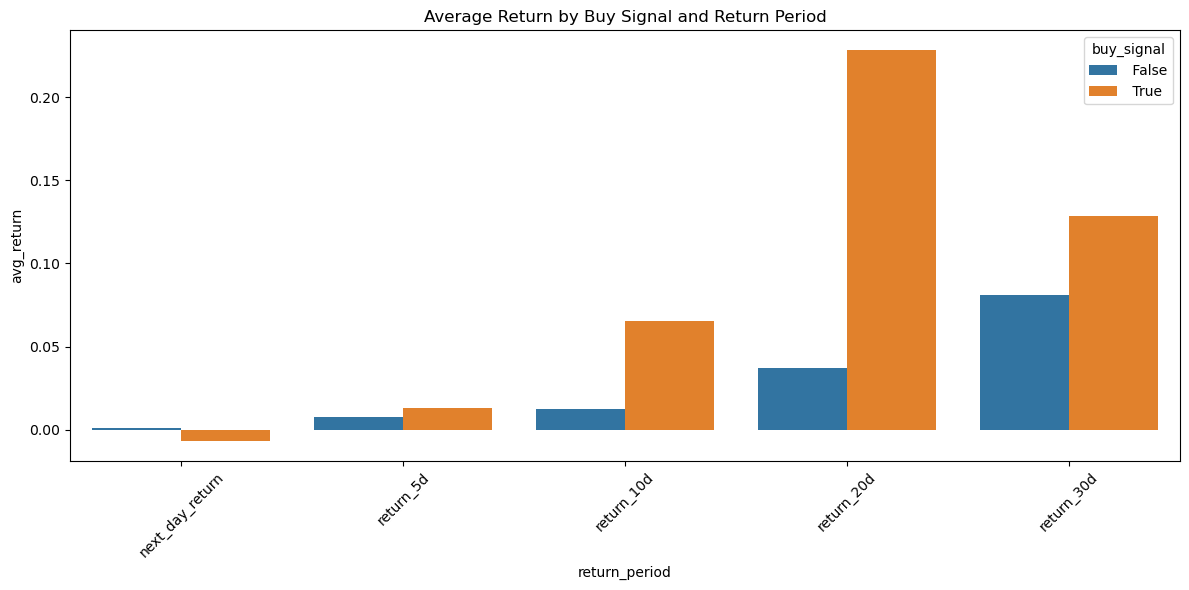

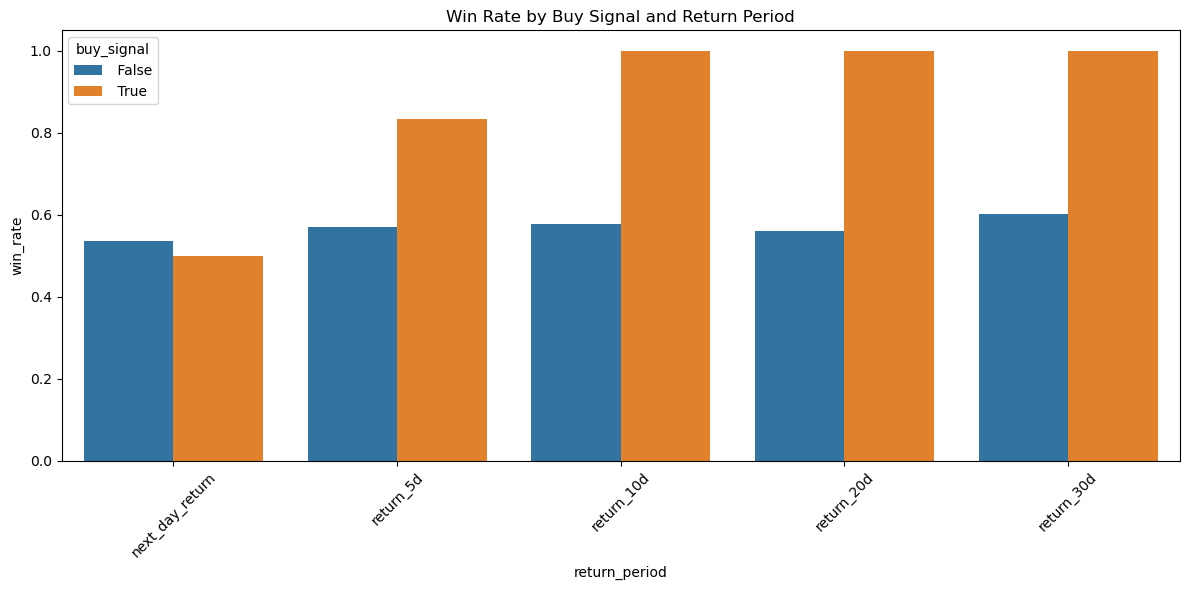

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "stock_results.txt"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['symbol', 'date'])

# Calculate returns for different horizons
horizons = [1, 5, 10, 20, 30]
for h in horizons:
    col_name = f'return_{h}d' if h > 1 else 'next_day_return'
    df[col_name] = df.groupby('symbol')['close_price'].pct_change(periods=h).shift(-h)

# Ensure buy_signal exists
if 'buy_signal' not in df.columns:
    df['buy_signal'] = False

# Summarize returns with count and win rate
def summarize_returns(df, col):
    df_filtered = df.dropna(subset=[col])
    summary = df_filtered.groupby('buy_signal').agg(
        count=(col, 'size'),
        avg_return=(col, 'mean'),
        median_return=(col, 'median'),
        win_rate=(col, lambda x: (x > 0).mean())
    ).reset_index()
    summary['return_period'] = col
    return summary

summary_list = [summarize_returns(df, 'next_day_return')]
summary_list += [summarize_returns(df, f'return_{h}d') for h in horizons if h != 1]
summary = pd.concat(summary_list, ignore_index=True)

# Display summary table
print(summary)

# Plot average return by buy_signal and return period
plt.figure(figsize=(12,6))
sns.barplot(data=summary, x='return_period', y='avg_return', hue='buy_signal')
plt.title("Average Return by Buy Signal and Return Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot win rate by buy_signal and return period
plt.figure(figsize=(12,6))
sns.barplot(data=summary, x='return_period', y='win_rate', hue='buy_signal')
plt.title("Win Rate by Buy Signal and Return Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
df.to_csv(r'stock_results.csv')

In [16]:
import pandas as pd

# Load data from your CSV-like text file
file_path = "stock_results.txt"
df = pd.read_csv(file_path)
df

,id,symbol,open_price,close_price,high_price,low_price,volume,date,SMA_10,SMA_50,RSI,MACD,Signal,buy_signal
0,647,MSFT,496.47,492.05,498.05,490.98,19945375,2025-07-01 00:00:00,488.69,450.68,70.89,12.44,12.560539,False
1,847,NVDA,156.29,153.30,157.20,151.49,213143621,2025-07-01 00:00:00,150.39,131.67,64.85,6.34,5.919240,True
2,747,TSLA,298.46,300.71,305.89,293.21,145085665,2025-07-01 00:00:00,324.50,314.01,38.54,-0.09,2.951524,False
3,648,MSFT,497.04,497.41,500.76,495.33,28368991,2025-06-30 00:00:00,487.40,448.19,76.21,12.96,12.590702,False
4,748,TSLA,319.90,317.66,325.58,316.60,76695081,2025-06-30 00:00:00,327.35,312.82,54.08,2.09,3.711563,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,745,MSFT,416.48,409.75,418.65,408.10,22886844,2025-02-07 00:00:00,NaN,NaN,NaN,-0.48,-0.096843,False
296,945,NVDA,129.22,129.84,130.37,125.00,228186298,2025-02-07 00:00:00,NaN,NaN,NaN,0.09,0.018507,False
297,946,NVDA,127.42,128.68,128.77,125.21,251483574,2025-02-06 00:00:00,NaN,NaN,NaN,0.00,0.000000,False
298,746,MSFT,414.00,415.82,418.20,414.00,16309755,2025-02-06 00:00:00,NaN,NaN,NaN,0.00,0.000000,False


In [17]:
print(df.head())
print(df.columns.tolist())
print(repr(df.columns[ df.columns.get_loc("date") ]))  # See if there are hidden chars


    id  symbol   open_price   close_price   high_price   low_price     volume  \
0  647    MSFT       496.47        492.05       498.05      490.98   19945375   
1  847    NVDA       156.29        153.30       157.20      151.49  213143621   
2  747    TSLA       298.46        300.71       305.89      293.21  145085665   
3  648    MSFT       497.04        497.41       500.76      495.33   28368991   
4  748    TSLA       319.90        317.66       325.58      316.60   76695081   

                   date   SMA_10   SMA_50     RSI   MACD     Signal  \
0   2025-07-01 00:00:00   488.69   450.68   70.89  12.44  12.560539   
1   2025-07-01 00:00:00   150.39   131.67   64.85   6.34   5.919240   
2   2025-07-01 00:00:00   324.50   314.01   38.54  -0.09   2.951524   
3   2025-06-30 00:00:00   487.40   448.19   76.21  12.96  12.590702   
4   2025-06-30 00:00:00   327.35   312.82   54.08   2.09   3.711563   

   buy_signal  
0       False  
1        True  
2       False  
3       False  
4     

KeyError: 'date'